In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# 我但我看现在llm的trainer.py的lr_scheduler里，一般没有model_size这个参数
def learning_rate_warmup(step:int, model_size:int, factor:float, warmup:int):
    """
    we have to default the step to 1 for LambdaLR function
    to avoid zero raising to negative power.
    """
    if step == 0:
        step = 1
    scale=min(step ** (-0.5), step * warmup ** (-1.5))
    return factor * (model_size ** (-0.5) * scale)

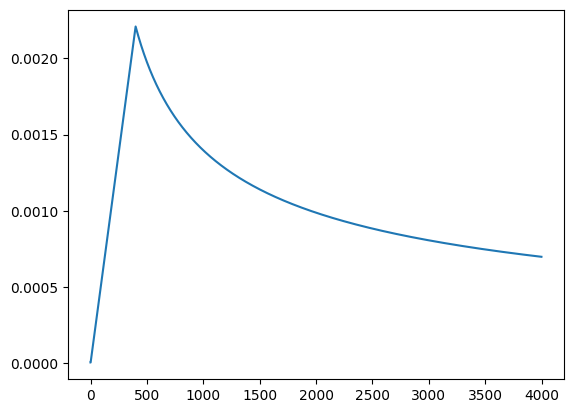

In [7]:
x=np.arange(0,4000)
import matplotlib.pyplot as plt
f=np.frompyfunc(lambda a:learning_rate_warmup(a, model_size=512, factor=1.0, warmup=400),1,1) # 在400时取最大值
y=f(x)
plt.plot(x,y)

In [11]:
np.max(y),np.argmax(y),np.min(y)

(0.0022097086912079614, 400, 5.524271728019903e-06)